# <center>Analyzing Date and Time Tasks</center>

In [6]:
import pandas as pd

## Assignment 1: Date Formats and Date Parts

* First, convert the `date` column to datetime64, by any method.

* Then, create a column representing the time difference between the last date in the data and each date. 

* Next, create columns for the date parts year, month, and weekday.

* Finally, format the date to Year-Month-Day (This will be a string/object).

In [7]:
transaction_df =pd.read_csv("transactions.csv",parse_dates=["date"])

In [8]:
#we can also convert
df =pd.read_csv("transactions.csv")
df["date"] = pd.to_datetime(df["date"])



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [10]:
transaction_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [11]:
#calculate the maximum datetime
transaction_df["date"].max()

Timestamp('2017-08-15 00:00:00')

In [12]:
#difference between date and max date

transaction_df["time_to_last_date"] = (transaction_df["date"].max()
-transaction_df["date"])

In [13]:
transaction_df

,date,store_nbr,transactions,time_to_last_date
0,2013-01-01,25,770,1687 days
1,2013-01-02,1,2111,1686 days
2,2013-01-02,2,2358,1686 days
3,2013-01-02,3,3487,1686 days
4,2013-01-02,4,1922,1686 days
...,...,...,...,...
83483,2017-08-15,50,2804,0 days
83484,2017-08-15,51,1573,0 days
83485,2017-08-15,52,2255,0 days
83486,2017-08-15,53,932,0 days


In [14]:
#datepart
transaction_df["year"] = transaction_df["date"].dt.year
transaction_df["month"]  =transaction_df["date"].dt.month
transaction_df["day_of_week"] =transaction_df["date"].dt.weekday

In [15]:
#format the date column

transaction_df["date"] =transaction_df["date"].dt.strftime("%Y-%B-%d")

In [16]:
transaction_df.head()

,date,store_nbr,transactions,time_to_last_date,year,month,day_of_week
0,2013-January-01,25,770,1687 days,2013,1,1
1,2013-January-02,1,2111,1686 days,2013,1,2
2,2013-January-02,2,2358,1686 days,2013,1,2
3,2013-January-02,3,3487,1686 days,2013,1,2
4,2013-January-02,4,1922,1686 days,2013,1,2


##  Assignment 2: Time Arithmetic


Hi again,

I just got word the the true max date in our data was three weeks after 2017-08-15.

* Can you add three weeks to the ‘time_to_last_date’ column? 
* Then, calculate ‘weeks_to_last_date’ by dividing the number of days  in ‘time_to_last_date’ by 7.

Thanks

In [17]:
df["year"] = df["date"].dt.year
df["month"]  = df["date"].dt.month
df["day_of_week"] = df["date"].dt.weekday
df["time_to_last_date"] = df["date"].max() -df["date"]

In [45]:
df

,date,store_nbr,transactions,year,month,day_of_week,time_to_last_date,week_to_last_date
0,2013-01-01,25,770,2013,1,1,1708 days,244.000000
1,2013-01-02,1,2111,2013,1,2,1707 days,243.857143
2,2013-01-02,2,2358,2013,1,2,1707 days,243.857143
3,2013-01-02,3,3487,2013,1,2,1707 days,243.857143
4,2013-01-02,4,1922,2013,1,2,1707 days,243.857143
...,...,...,...,...,...,...,...,...
83483,2017-08-15,50,2804,2017,8,1,21 days,3.000000
83484,2017-08-15,51,1573,2017,8,1,21 days,3.000000
83485,2017-08-15,52,2255,2017,8,1,21 days,3.000000
83486,2017-08-15,53,932,2017,8,1,21 days,3.000000


In [19]:
#add 3 weeks to time_to_last_date colum
df["time_to_last_date"] =pd.to_timedelta(21,unit="D") + df["time_to_last_date"]

In [20]:
df["week_to_last_date"]= df["time_to_last_date"].dt.days/7

In [21]:
df

,date,store_nbr,transactions,year,month,day_of_week,time_to_last_date,week_to_last_date
0,2013-01-01,25,770,2013,1,1,1708 days,244.000000
1,2013-01-02,1,2111,2013,1,2,1707 days,243.857143
2,2013-01-02,2,2358,2013,1,2,1707 days,243.857143
3,2013-01-02,3,3487,2013,1,2,1707 days,243.857143
4,2013-01-02,4,1922,2013,1,2,1707 days,243.857143
...,...,...,...,...,...,...,...,...
83483,2017-08-15,50,2804,2017,8,1,21 days,3.000000
83484,2017-08-15,51,1573,2017,8,1,21 days,3.000000
83485,2017-08-15,52,2255,2017,8,1,21 days,3.000000
83486,2017-08-15,53,932,2017,8,1,21 days,3.000000


## Assignment 3: Missing Time Series Data

Take a look at the mean value for the oil price using forward fill, backfill, and interpolation. Are they very different?

Then, plot the series with forward fill for:
 * The year 2014.
 * The month of December 2014.
 * The days from December 1st to December 15th, 2014.

In [22]:
oil_df =pd.read_csv("oil.csv",index_col ="date",parse_dates= True)

<Axes: xlabel='date'>

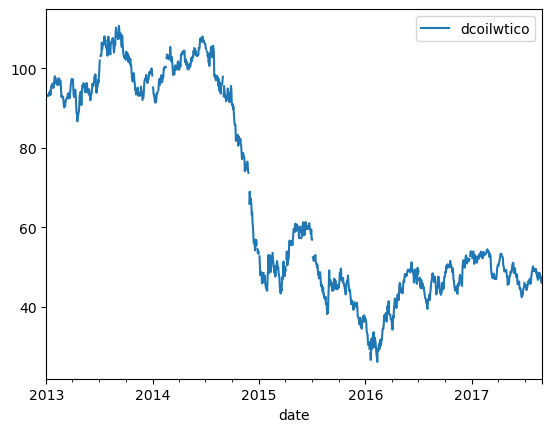

In [23]:
oil_df.plot()

In [24]:
oil_df.mean()

dcoilwtico    67.714366
dtype: float64

In [25]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1218 entries, 2013-01-01 to 2017-08-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dcoilwtico  1175 non-null   float64
dtypes: float64(1)
memory usage: 19.0 KB


In [26]:
oil_df["dcoilwtico"].isnull()

date
2013-01-01     True
2013-01-02    False
2013-01-03    False
2013-01-04    False
2013-01-07    False
              ...  
2017-08-25    False
2017-08-28    False
2017-08-29    False
2017-08-30    False
2017-08-31    False
Name: dcoilwtico, Length: 1218, dtype: bool

In [27]:
df_nan_rows = oil_df.loc[oil_df.isnull().any(axis=1)]


In [28]:
df_nan_rows

,dcoilwtico
date,
2013-01-01,NaN
2013-01-21,NaN
2013-02-18,NaN
2013-03-29,NaN
2013-05-27,NaN
2013-07-04,NaN
2013-09-02,NaN
2013-11-28,NaN
2013-12-25,NaN


In [29]:
print(oil_df.ffill().mean(),oil_df.bfill().mean(),oil_df.interpolate().mean())
#the mean values are almost similar when using ffill,bfill and interpolate

dcoilwtico    67.671249
dtype: float64 dcoilwtico    67.673325
dtype: float64 dcoilwtico    67.661824
dtype: float64


<Axes: xlabel='date'>

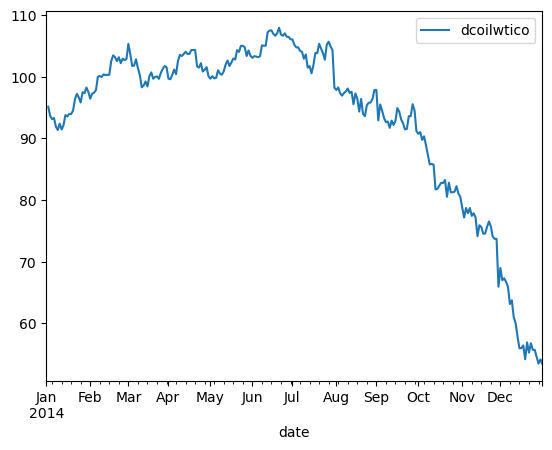

In [30]:
#filter to 2014 the plot the forward filled series

oil_df.loc["2014"].ffill().plot()

<Axes: xlabel='date'>

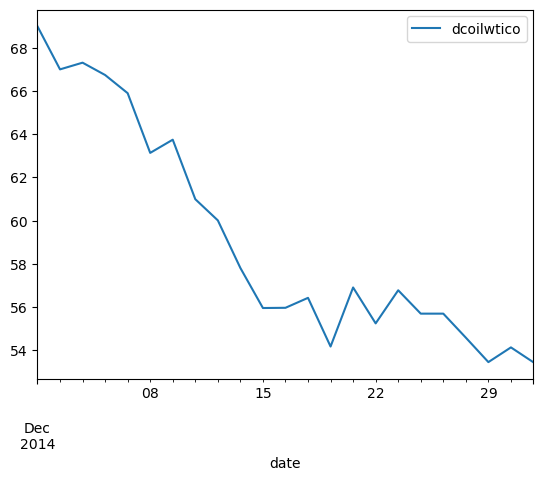

In [31]:
#filter the dataframe to december 2014 the plot forward filled series
oil_df.loc["2014-12"].ffill().plot()

<Axes: xlabel='date'>

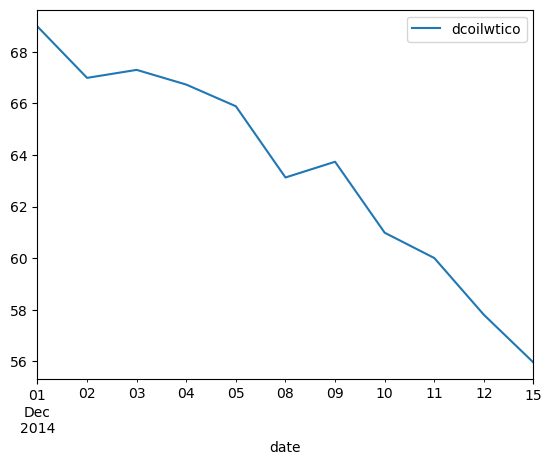

In [32]:
#filter the first two weeek of december 2014 then plot forward filled series

oil_df.loc["2014-12-01":"2014-12-15"].ffill().plot()

## Assignment 4: Shift and Diff

Hello,
I’m looking into a few different year over year trends related to changes made at store 47.

Can you plot the sum of monthly of transactions in year 2015 vs the sum of monthly transactions in the year prior for store 47?

Make sure to group your DataFrame by year AND month!

Thanks

In [50]:
#filter the store 47 transaction
df_47  = df.loc[df["store_nbr"] ==47,["date","transactions"]]

In [109]:
df_47

,transactions
date,
2013-01-02,4161
2013-01-03,3660
2013-01-04,3915
2013-01-05,4764
2013-01-06,4935


In [56]:
#groupby year and month transaction for store 47
year_month = (df_47.groupby([df_47["date"].dt.year,df_47["date"].dt.month])
 .sum())
year_month

C:\Users\Nandhini\AppData\Local\Temp\ipykernel_2764\151882056.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .sum())


transactions
date date              
2013 1           109668
     2           103706
     3           116873
     4           108571
     5           113532
     6           110637
     7           107506
     8           112001
     9           114468
     10          114585
     11          114436
     12          150204
2014 1           114190
     2           107175
     3           121771
     4           122976
     5           126298
     6           118398
     7           118522
     8           121949
     9           115552
     10          116741
     11          116996
     12          147371
2015 1           118445
     2           108186
     3           119883
     4           118449
     5           120810
     6           110814
     7           116234
     8           119307
     9           112975
     10          117712
     11          117564
     12          149747
2016 1           108521
     2           111132
     3           116599
     4           117046
     5           115799
     6           108539
     7           114724
     8           114185
     9           112026
     10          116242
     11          118587
     12          149367
2017 1           118000
     2           109254
     3           119122
     4           119174
     5           120941
     6           114171
     7           120588
     8            57541

In [58]:
#calculate a year prior by shifting monthly sales series forward by 12

year_month["year_prior"] = year_month["transactions"].shift(12)

In [59]:
year_month

transactions  year_prior
date date                          
2013 1           109668         NaN
     2           103706         NaN
     3           116873         NaN
     4           108571         NaN
     5           113532         NaN
     6           110637         NaN
     7           107506         NaN
     8           112001         NaN
     9           114468         NaN
     10          114585         NaN
     11          114436         NaN
     12          150204         NaN
2014 1           114190    109668.0
     2           107175    103706.0
     3           121771    116873.0
     4           122976    108571.0
     5           126298    113532.0
     6           118398    110637.0
     7           118522    107506.0
     8           121949    112001.0
     9           115552    114468.0
     10          116741    114585.0
     11          116996    114436.0
     12          147371    150204.0
2015 1           118445    114190.0
     2           108186    107175.0
     3           119883    121771.0
     4           118449    122976.0
     5           120810    126298.0
     6           110814    118398.0
     7           116234    118522.0
     8           119307    121949.0
     9           112975    115552.0
     10          117712    116741.0
     11          117564    116996.0
     12          149747    147371.0
2016 1           108521    118445.0
     2           111132    108186.0
     3           116599    119883.0
     4           117046    118449.0
     5           115799    120810.0
     6           108539    110814.0
     7           114724    116234.0
     8           114185    119307.0
     9           112026    112975.0
     10          116242    117712.0
     11          118587    117564.0
     12          149367    149747.0
2017 1           118000    108521.0
     2           109254    111132.0
     3           119122    116599.0
     4           119174    117046.0
     5           120941    115799.0
     6           114171    108539.0
     7           120588    114724.0
     8            57541    114185.0

<Axes: xlabel='date'>

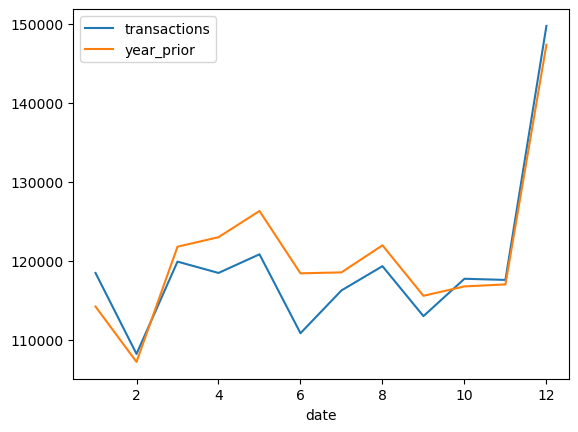

In [61]:
#filter to 2015 and plot
year_month.loc[2015].plot()

##  Assignment 5: Resampling Time Series

Plot the monthly and yearly average oil prices.

In [63]:
oil_df.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


<Axes: xlabel='date'>

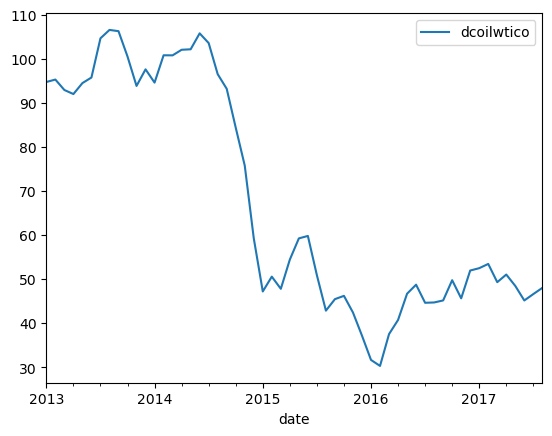

In [65]:
#monthly average oil price
oil_df.resample("M").mean().plot()

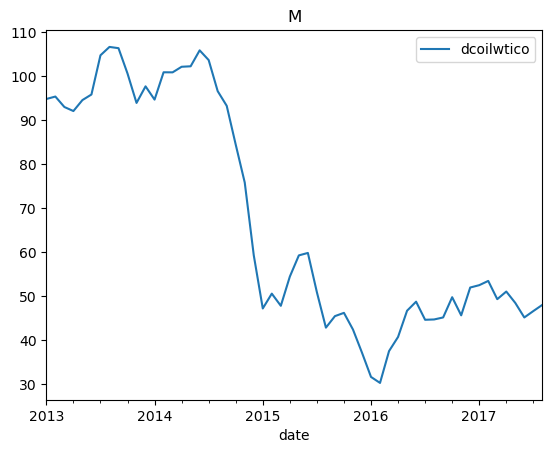

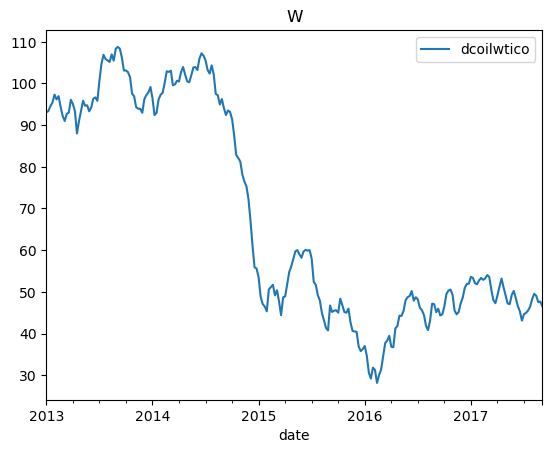

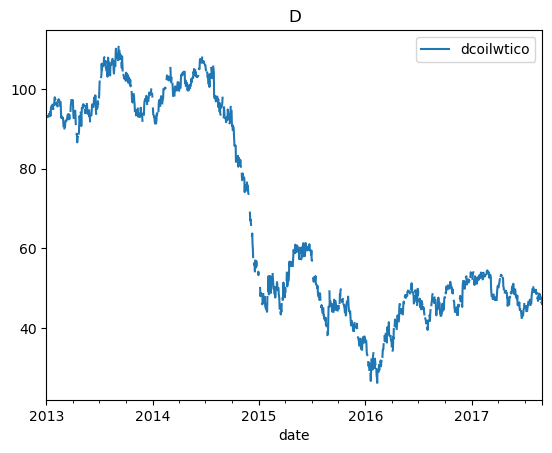

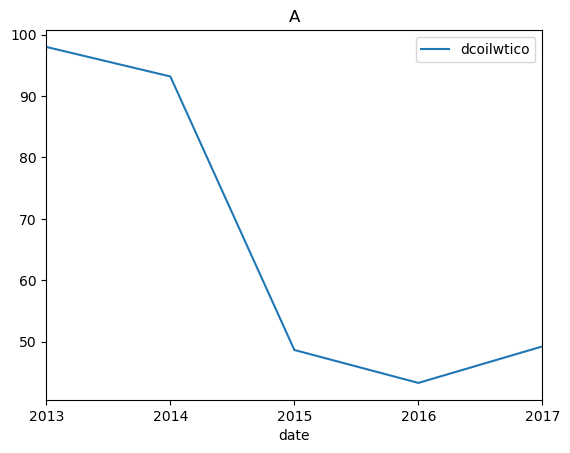

In [76]:
period = ["M","W","D","A"]
for i in period:
    oil_df.resample(i).mean().plot(title =i)


##  Assignment 6: Rolling Averages

Plot the 90-day moving average for transactions for store 47.

This will help remove some of the noise from our series.

Thanks!


In [117]:
df_47  = df.loc[df["store_nbr"] ==47,["date","transactions"]]
df_47 = df_47.set_index("date")
df_47

,transactions
date,
2013-01-02,4161
2013-01-03,3660
2013-01-04,3915
2013-01-05,4764
2013-01-06,4935
...,...
2017-08-11,4009
2017-08-12,3825
2017-08-13,3741


In [126]:
df_rolling = (df_47.assign(trans_rolling_avg_90 =df_47.rolling(90).mean())
             .drop(["transactions"],axis=1))

<Axes: xlabel='date'>

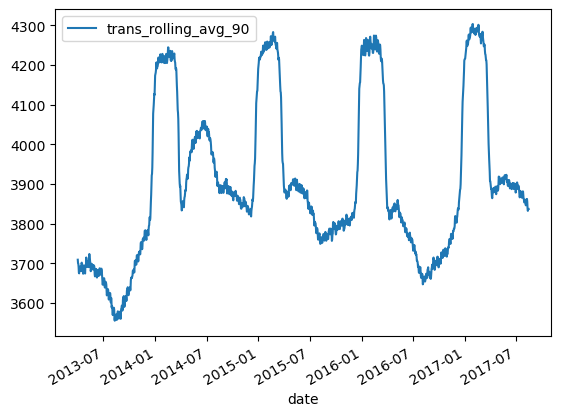

In [127]:
df_rolling.plot()

<Axes: xlabel='date'>

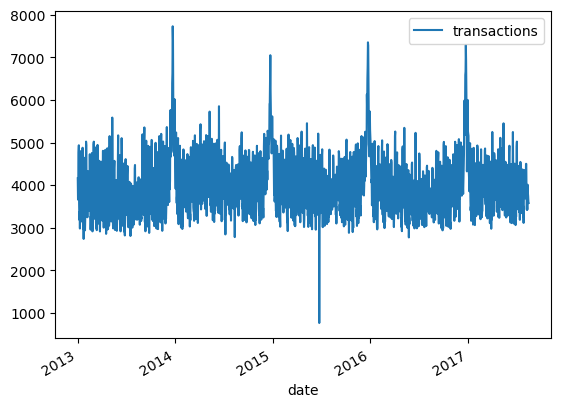

In [120]:
df_47.plot()